In [1]:
import json
from pathlib import Path

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
algorithms = {
    "Sub-LOF_final": "sub_lof",
}
algo_timeeval_names = {
    "sub_lof": "Subsequence LOF"
}
algorithm_order = list(algorithms.keys())

result_folder_names = [
    "12_25",
    "195_UCR_Anomaly_sel840mECG1",
    "229_UCR_Anomaly_mit14134longtermecg",
]

base_dir = Path("../results")

In [3]:
color_map = {
    'default': '#407ba7',
    # 'timeeval': '#228b22',  # green
    'timeeval': '#1b98e0',  # original blueish
    'optimization': '#82a0bc',
    'model': '#fb8500',
}
colors = list(color_map.values())
sns.color_palette(colors)

[(0.25098039215686274, 0.4823529411764706, 0.6549019607843137),
 (0.10588235294117647, 0.596078431372549, 0.8784313725490196),
 (0.5098039215686274, 0.6274509803921569, 0.7372549019607844),
 (0.984313725490196, 0.5215686274509804, 0.0)]

In [4]:
def get_study_name(algorithm: str, timeseries: str):
    return f"{algorithm}.{timeseries}"

def read_dict(path: Path):
    with open(path) as file:
        return json.load(file)

## Figure 7

For Section 4.4 Application on real-world data

In [5]:
metric = "auc_pr_score"
metric_name = "AUC-PR Score"
dataset_names = [
    "195_UCR_Anomaly_sel840mECG1",
    "119_UCR_Anomaly_ECG1",
    "229_UCR_Anomaly_mit14134longtermecg",
    "096_UCR_Anomaly_NOISEECG4",
    "017_UCR_Anomaly_DISTORTEDECG4",
]
algorithm = list(algorithms.values())[0]
results = []

for ts in result_folder_names:
    trials_default = pd.read_csv(base_dir / ts / "trial_results_default_parameters.csv")
    trials_default["type"] = "Default Parameters"
    # trials_timeeval = pd.read_csv(base_dir / ts / "trial_results_timeeval_parameters.csv")
    # trials_timeeval["type"] = "Timeeval Heuristics"
    trials_model = pd.read_csv(base_dir / ts / "trial_results_parameter_model.csv")
    trials_model["type"] = "Our Model"
    trials_full_optim = pd.read_csv(base_dir / ts / "trial_results_full_optimization.csv")
    trials_full_optim["type"] = "Full Optimization"

    df = pd.concat([
        trials_model,
        trials_full_optim,
        trials_default,
    ])
    results.append(df)
df = pd.concat(results)
df = df[df["timeseries"].isin(dataset_names)]

df.rename(columns={
    "id": "Step",
    metric: metric_name,
}, inplace=True)

# reduce to plotting relevant data
df = df[[
    "algorithm",
    "timeseries",
    "Step",
    "type",
    metric_name
]]
df

,algorithm,timeseries,Step,type,AUC-PR Score
1,sub_lof,017_UCR_Anomaly_DISTORTEDECG4,1,Our Model,0.997196
2,sub_lof,096_UCR_Anomaly_NOISEECG4,1,Our Model,0.988727
4,sub_lof,119_UCR_Anomaly_ECG1,1,Our Model,0.975255
1,sub_lof,017_UCR_Anomaly_DISTORTEDECG4,0,Full Optimization,0.987491
2,sub_lof,096_UCR_Anomaly_NOISEECG4,0,Full Optimization,0.906463
...,...,...,...,...,...
296,sub_lof,229_UCR_Anomaly_mit14134longtermecg,296,Full Optimization,0.990455
297,sub_lof,229_UCR_Anomaly_mit14134longtermecg,297,Full Optimization,0.088908
298,sub_lof,229_UCR_Anomaly_mit14134longtermecg,298,Full Optimization,1.000000
299,sub_lof,229_UCR_Anomaly_mit14134longtermecg,299,Full Optimization,0.982576


In [6]:
# retrieve TimeEval results
df_timeeval = pd.read_csv("../../results/paper-plots-results.csv")
timeseries = df["timeseries"].unique()
print("Looking for timeseries:", ", ".join(timeseries))
timeeval = df_timeeval.loc[(df_timeeval["dataset"].isin(timeseries)) & (df_timeeval["algorithm"] == algo_timeeval_names[algorithm])]

trials_timeeval = pd.DataFrame(index=np.arange(timeseries.shape[0]), columns=["algorithm", "timeseries", "Step", "type", metric_name])
trials_timeeval["Step"] = 1
trials_timeeval["type"] = "TimeEval Heuristics"
trials_timeeval["algorithm"] = algorithm
trials_timeeval["timeseries"] = timeeval["dataset"].values
trials_timeeval[metric_name] = timeeval["PR_AUC"].fillna(0.).values
# trials_timeeval["roc_auc_score"] = timeeval["ROC_AUC"]

# timeeval["hyper_params_obj"] = timeeval["hyper_params"].apply(json.loads)
# hyper_params = timeeval["hyper_params"]
# trials_timeeval["params"] = hyper_params
# trials_timeeval["params_window_size"] = timeeval["hyper_params_obj"].str["window_size"]
# trials_timeeval["params_n_neighbors"] = timeeval["hyper_params_obj"].str["n_neighbors"]
# trials_timeeval["params_leaf_size"] = timeeval["hyper_params_obj"].str["leaf_size"]
# trials_timeeval["params_distance_metric_order"] = timeeval["hyper_params_obj"].str["distance_metric_order"]
# trials_timeeval["params_random_state"] = timeeval["hyper_params_obj"].str["random_state"]

df = pd.concat([df, trials_timeeval])
df

Looking for timeseries: 017_UCR_Anomaly_DISTORTEDECG4, 096_UCR_Anomaly_NOISEECG4, 119_UCR_Anomaly_ECG1, 195_UCR_Anomaly_sel840mECG1, 229_UCR_Anomaly_mit14134longtermecg


,algorithm,timeseries,Step,type,AUC-PR Score
1,sub_lof,017_UCR_Anomaly_DISTORTEDECG4,1,Our Model,0.997196
2,sub_lof,096_UCR_Anomaly_NOISEECG4,1,Our Model,0.988727
4,sub_lof,119_UCR_Anomaly_ECG1,1,Our Model,0.975255
1,sub_lof,017_UCR_Anomaly_DISTORTEDECG4,0,Full Optimization,0.987491
2,sub_lof,096_UCR_Anomaly_NOISEECG4,0,Full Optimization,0.906463
...,...,...,...,...,...
0,sub_lof,017_UCR_Anomaly_DISTORTEDECG4,1,TimeEval Heuristics,0.939853
1,sub_lof,096_UCR_Anomaly_NOISEECG4,1,TimeEval Heuristics,0.948881
2,sub_lof,119_UCR_Anomaly_ECG1,1,TimeEval Heuristics,0.991877
3,sub_lof,195_UCR_Anomaly_sel840mECG1,1,TimeEval Heuristics,0.295692


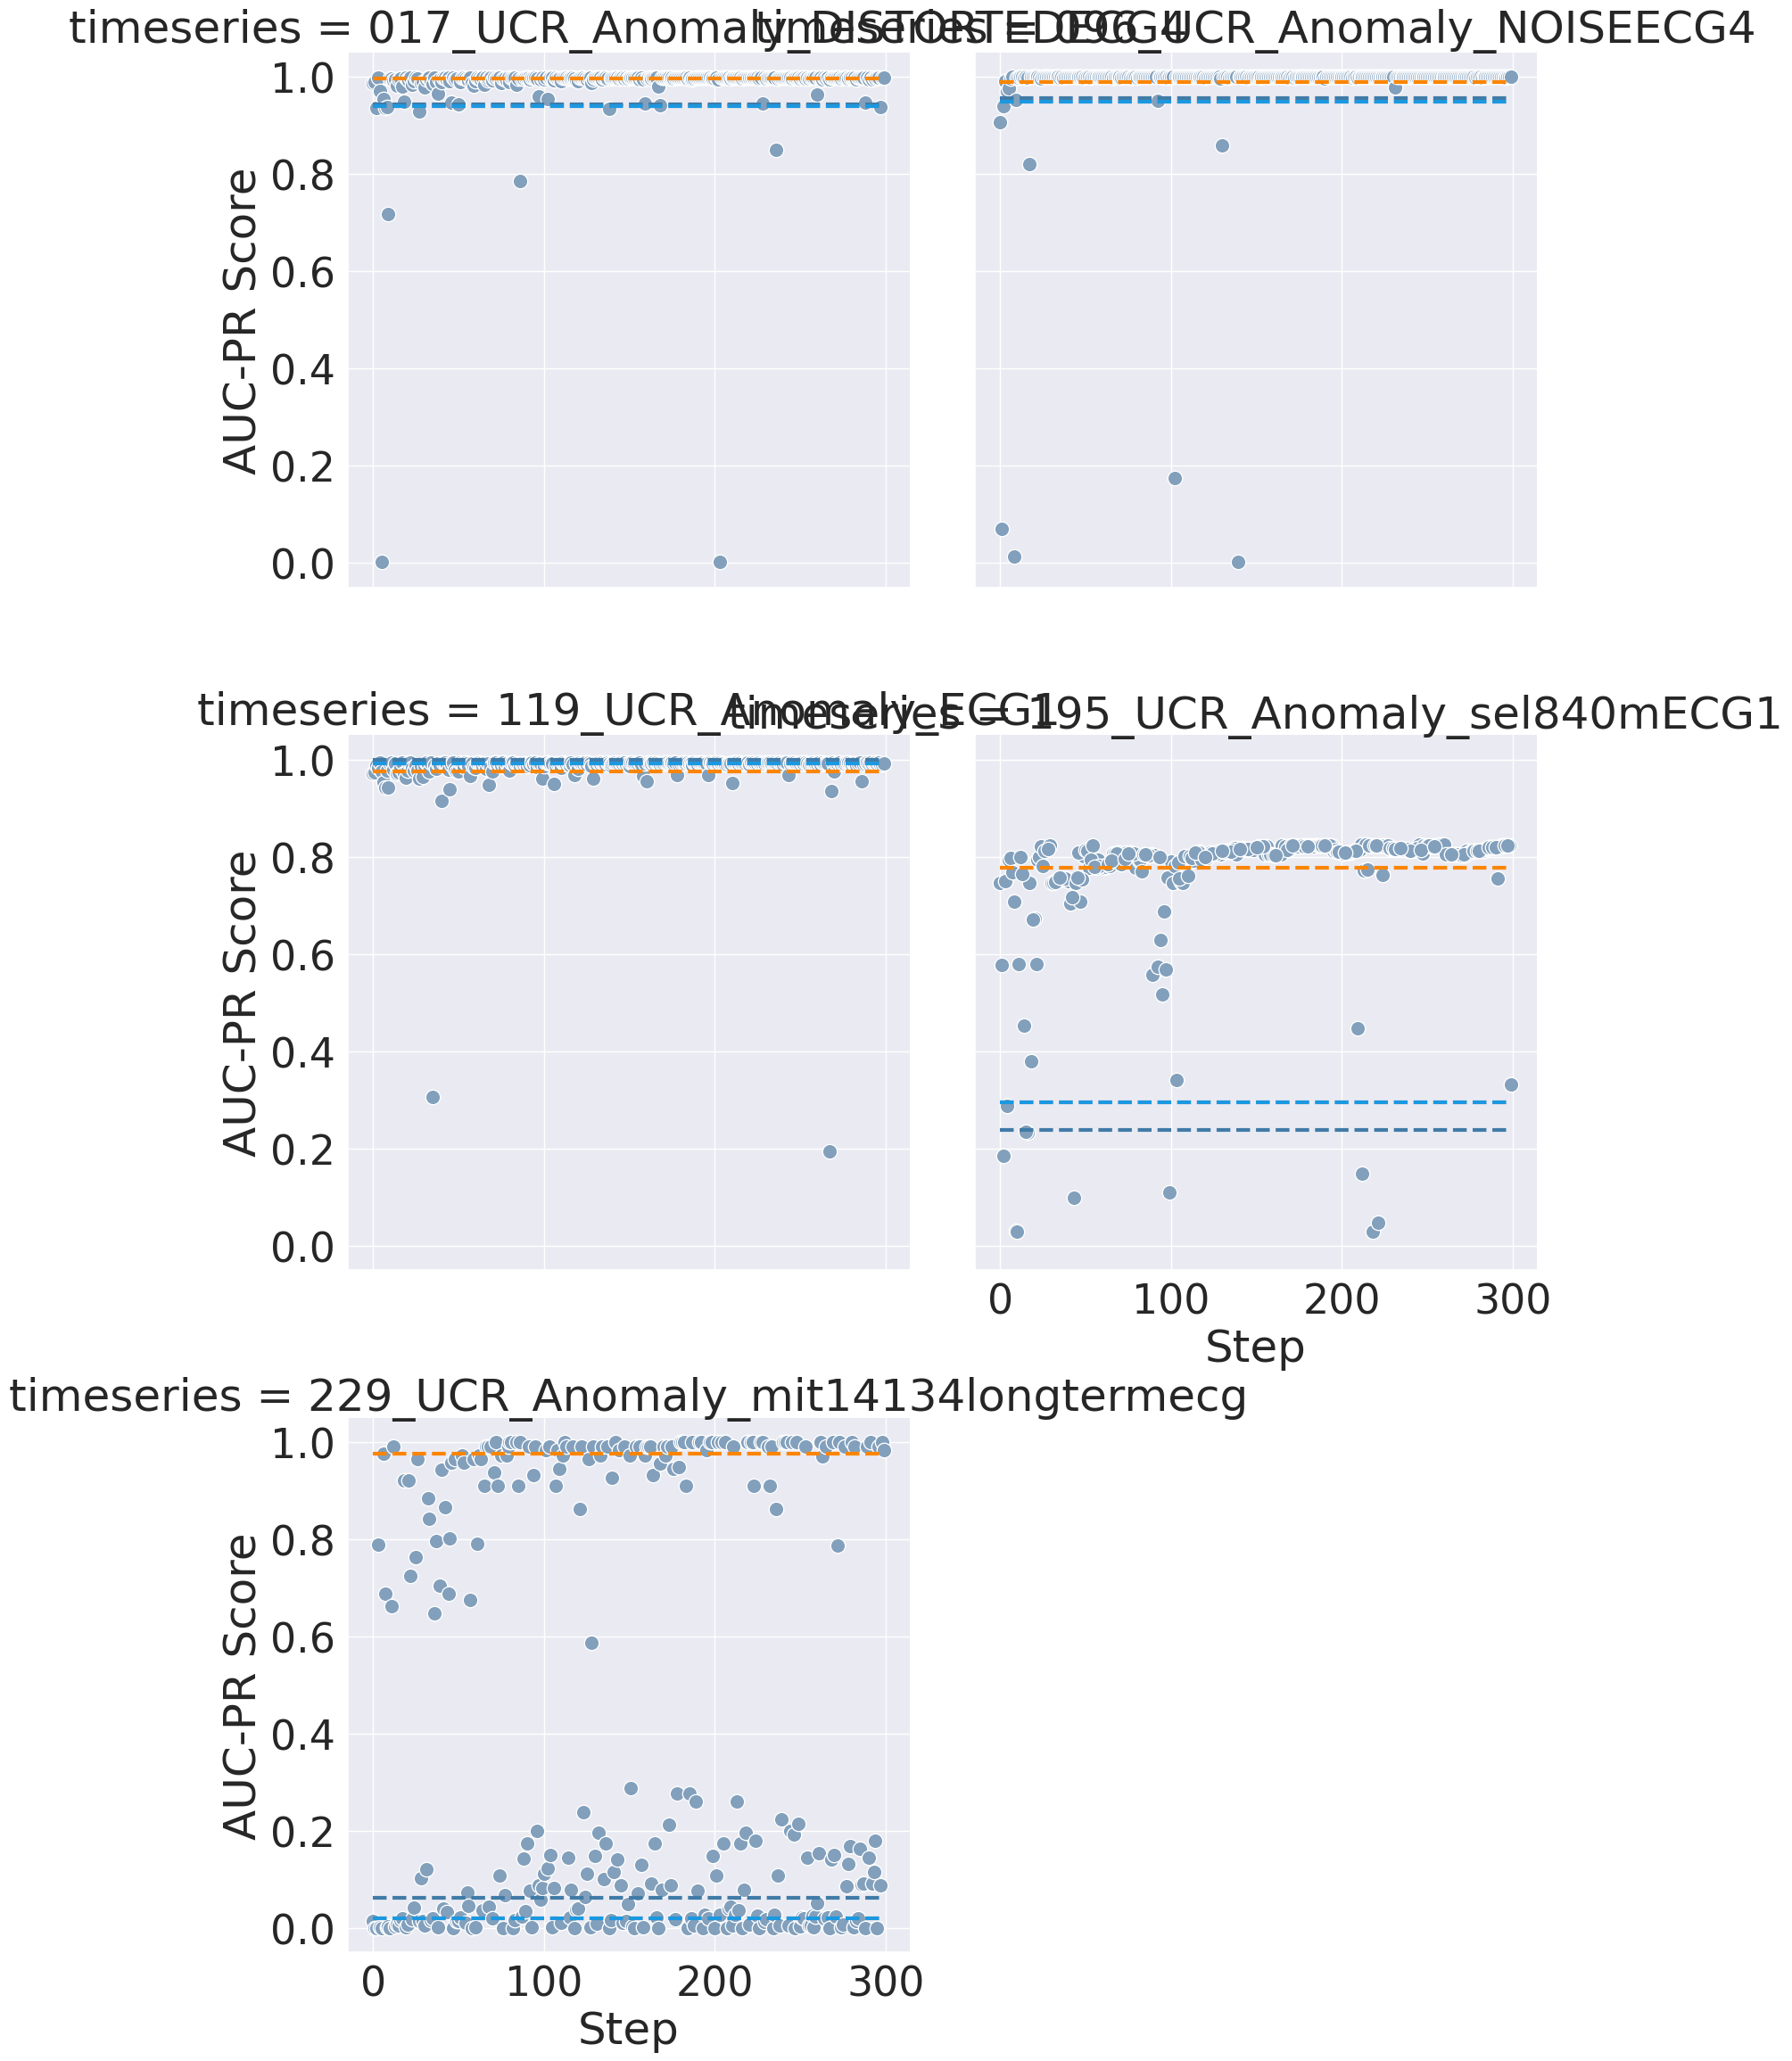

In [7]:
sns.set(font_scale=3)
g = sns.FacetGrid(df, col="timeseries", hue="type", col_wrap=2, height=8, aspect=1)

def plot_scatter(*args, **kwargs):
    data = kwargs["data"]
    color = kwargs["color"]
    y = kwargs["y"]

    if kwargs["label"] == "Default Parameters":
        value = data[y].iloc[0]
        sns.lineplot(x=[0, df["Step"].max()], y=[value, value], color=color_map["default"], lw=3, linestyle="--")
        return

    if kwargs["label"] == "TimeEval Heuristics":
        for value in data[y]:
            sns.lineplot(x=[0, df["Step"].max()], y=[value, value], color=color, lw=3, linestyle="--", alpha=0.4)

        max_value = data[y].max()
        sns.lineplot(x=[0, df["Step"].max()], y=[max_value, max_value], color=color_map["timeeval"], lw=3, linestyle="--")
        return

    if kwargs["label"] == "Our Model":
        value = data[y].iloc[0]
        sns.lineplot(x=[0, df["Step"].max()], y=[value, value], color=color_map["model"], lw=3, linestyle="--")
        return

    _kwargs = {
        **kwargs,
        "color": color_map["optimization"] if kwargs["label"] == "Full Optimization" else color_map["model"],
    }

    sns.scatterplot(*args, **_kwargs)

g.map_dataframe(plot_scatter, x="Step", y=metric_name, s=140)
#plt.savefig("real-world-ecg-sub-lof-plot.pdf")

In [8]:
colorpalette = dict(zip(["Default Parameters", "TimeEval Heuristics", "Full Optimization", "Our Model"], sns.color_palette(colors)))

df_tmp = df.copy()
df_tmp = df_tmp.groupby(["algorithm", "timeseries", "type"], dropna=False)[[metric_name]].max()
df_tmp = df_tmp.reset_index()
df_tmp["color"] = df_tmp["type"].apply(lambda x: colorpalette[x])
df_tmp["timeseries"] = df_tmp["timeseries"].str.split("_").str[-1]
df_tmp.pivot(index=["timeseries"], columns=["type"], values=[metric_name]).sort_values((metric_name, "Our Model"))

AUC-PR Score                              \
type                Default Parameters Full Optimization Our Model   
timeseries                                                           
sel840mECG1                   0.237955          0.824774  0.776415   
ECG1                          0.999691          0.993205  0.975255   
mit14134longtermecg           0.063081          1.000000  0.975962   
NOISEECG4                     0.955625          1.000000  0.988727   
DISTORTEDECG4                 0.944260          0.998526  0.997196   

                                         
type                TimeEval Heuristics  
timeseries                               
sel840mECG1                    0.295692  
ECG1                           0.991877  
mit14134longtermecg            0.020770  
NOISEECG4                      0.948881  
DISTORTEDECG4                  0.939853

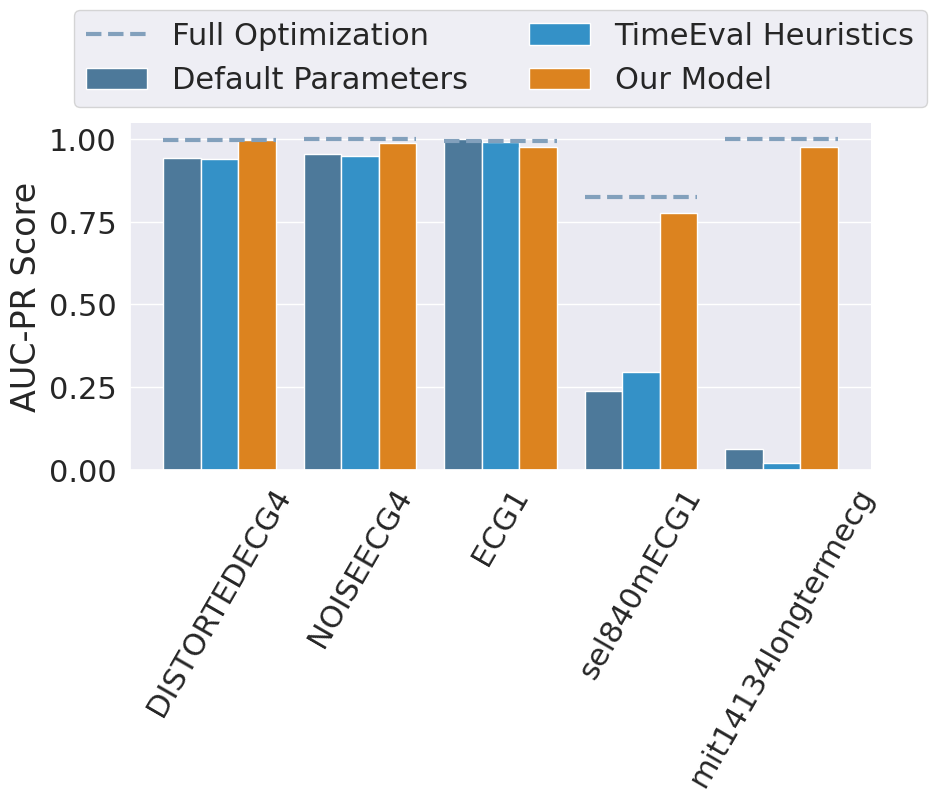

In [9]:
sns.set(font_scale=2)
g = sns.catplot(df_tmp[df_tmp["type"] != "Full Optimization"], x="timeseries", y=metric_name,
                hue="type",
                aspect=2,
                kind="bar",
                palette=np.array(colors)[[0, 1, 3]],
                hue_order=["Default Parameters", "TimeEval Heuristics", "Our Model"],
                legend=False)
g.set_xticklabels(rotation=60)
g.set_xlabels("")
xtick_labels = np.array([l.get_text() for l in g.ax.get_xticklabels()])

for i, ts in enumerate(xtick_labels):
    value = df_tmp.loc[(df_tmp["type"] == "Full Optimization") & (df_tmp["timeseries"] == ts), metric_name]
    plt.hlines(value, i-.4, i+.4, color=colorpalette["Full Optimization"], linestyles="dashed", label="Full Optimization", linewidth=3)

# reconfigure legend (add a single Full Opt. line)
handles, labels = plt.gca().get_legend_handles_labels()
handles = handles[xtick_labels.shape[0]-1:]
labels = labels[xtick_labels.shape[0]-1:]
labels.append("Full Optimization")
plt.legend(handles, labels, loc="lower center", bbox_to_anchor=(.5, 1), ncol=2)

plt.savefig("real-world-ecg-sub-lof-plot.pdf", bbox_inches="tight")
g

Original dataset


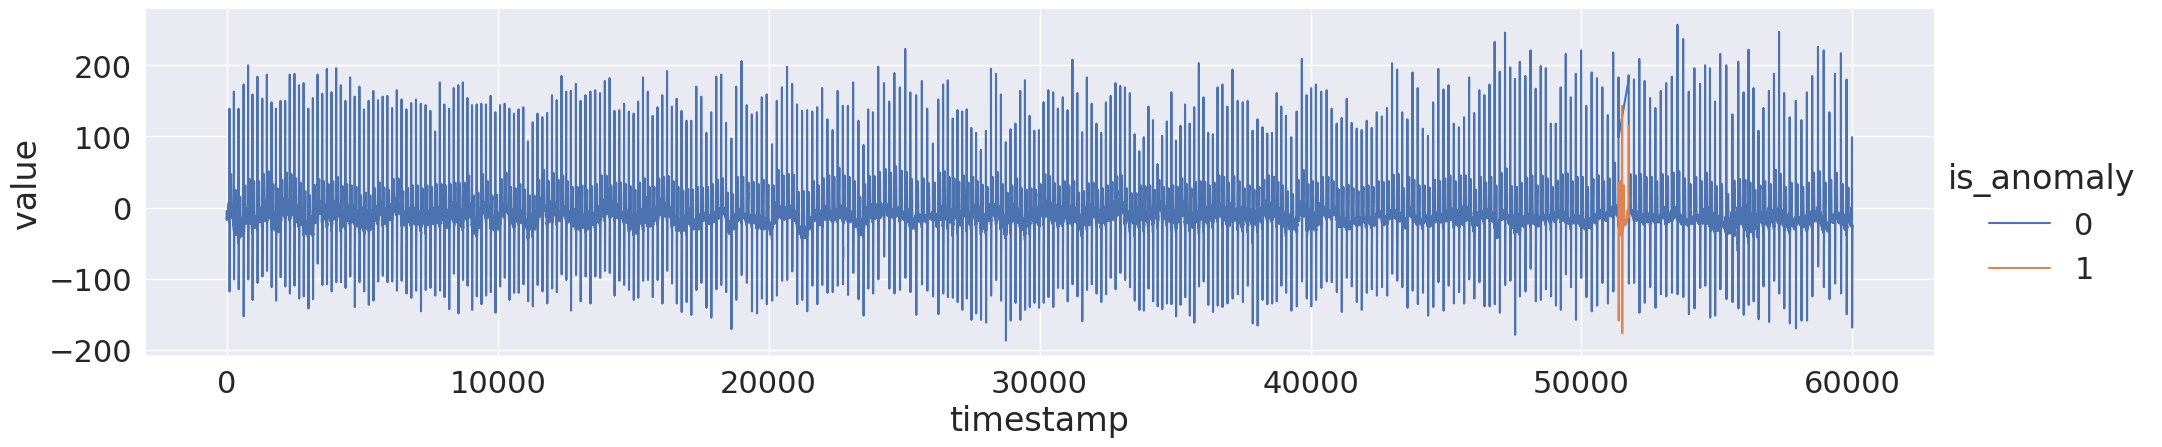

In [10]:
print("Original dataset")
ts = "195_UCR_Anomaly_sel840mECG1"
df_tmp = pd.read_csv(f"../../data/benchmark-data/data-processed/univariate/KDD-TSAD/{ts}.test.csv")
sns.relplot(df_tmp, x="timestamp", y="value", hue="is_anomaly", kind="line", height=5, aspect=4)